# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [129]:
df = pd.read_csv('/content/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [131]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [132]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [133]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [134]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [135]:
df1 = df.select_dtypes(include='number')
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [136]:
def remove_outliers(df1,col):

   for col in df1:
       Q1 = df1[col].quantile(0.25)
       Q3 = df1[col].quantile(0.75)
       IQR = Q3 -Q1
       upper = df1[col] - IQR * 1.5
       lower = df1[col] + IQR * 1.5
       df = (df1[col]<= upper)&(df1[col]>= lower)
       return df

In [137]:
df1.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [138]:
df['Location_Easting_OSGR'] = remove_outliers(df1,'Location_Easting_OSGR')
df['Location_Northing_OSGR'] = remove_outliers(df1,'Location_Northing_OSGR')
df['Latitude'] = remove_outliers(df1,'Latitude')
df['1st_Road_Number'] = remove_outliers(df1,'1st_Road_Number')
df['Speed_limit']= remove_outliers(df1,'Speed_limit')
df['2nd_Road_Number'] = remove_outliers(df1,'2nd_Road_Number')

In [139]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


#Handling Missing values

In [140]:
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean(),inplace=True)

In [141]:
df['Day_of_Week'].fillna(df['Day_of_Week'].mean(),inplace=True)
df['Time'].fillna(df['Time'].mode(),inplace=True)


In [142]:
df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].mean(),inplace=True)


In [143]:
df['Local_Authority_(Highway)'].fillna(df['Local_Authority_(Highway)'].mode(),inplace=True)
df['1st_Road_Class'].fillna(df['1st_Road_Class'].mean(),inplace=True)
df['Road_Type'].fillna(df['Road_Type'].mode(),inplace=True)
df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].mean(),inplace=True)
df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode(),inplace=True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode(),inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode(),inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode(),inplace=True)
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode(),inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(),inplace=True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].mode(),inplace=True)

df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode(),inplace=True)
df['Year'].fillna(df['Year'].mean(),inplace=True)


In [144]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [146]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,False,False,-2.268891,False,21,3,2.0,2,...,False,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,False,False,-1.802453,False,20,2,1.0,1,...,False,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,False,False,-0.327073,False,1,3,2.0,2,...,False,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,False,False,-1.978930,False,20,3,2.0,1,...,False,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,False,False,-1.678823,False,21,3,1.0,1,...,False,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [195]:
X  = df.iloc[:,4:6]
X

,Longitude,Latitude
0,-2.268891,False
1,-1.802453,False
2,-0.327073,False
3,-1.978930,False
4,-1.678823,False
...,...,...
51995,-1.570167,False
51996,-1.246470,False
51997,-0.178465,False
51998,-1.591972,False


In [220]:
y = df['Accident_Severity'].array.reshape(-1, 1)
y

<NumpyExtensionArray>
[
[3],
[2],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[2],
[3],
[3],
[3],
[1],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[1],
[3],
[3],
[3],
[2],
[2],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[2],
[3],
[3],
[3],
[3],
[1],
[3],
[3],
[2],
[3],
[3],
[2],
[3],
[2],
[3],
[3],
[2],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[3],
[2],
[3],
[2],
[3],
[

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [221]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_train_scaled
y_train_scaled = scale.fit(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 3. ... 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [206]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X_scaled)
Xpca

array([[ 0.86421208, -0.        ],
       [ 0.38607263,  0.        ],
       [-1.12631997,  0.        ],
       ...,
       [-1.27865607,  0.        ],
       [ 0.17031133, -0.        ],
       [-1.11910233,  0.        ]])

In [187]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
d1_scaled = one.fit_transform(d1)


TypeError: concat() takes 1 positional argument but 2 were given

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

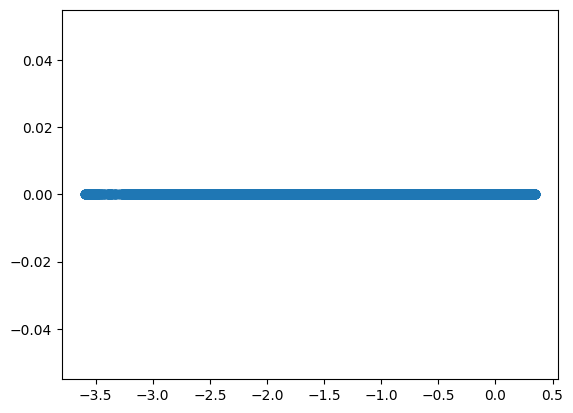

In [185]:
plt.scatter(data=df,x='Longitude',y='Latitude')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?